**Indiviudal Coursework: Campylobacter jejuni isolates from Australia**

**Data Filtering**

This section focusses on uploading the data and filtering the data frame to remove unnecessary sections.
Pandas and csv file are imported

In [286]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline
import os
from scipy import stats
from scipy.stats import chi2_contingency


In [287]:
data = pd.read_csv("Australia_Campy_Data.csv")

Load up the data the have a quick overview

In [288]:
data

,id,region,disease,source,epidemiology,aspA,glnA,gltA,glyA,pgm,tkt,uncA,ST_MLST,clonal_complex_MLST
0,74,NaN,gastroenteritis,human stool,sporadic case,20.0,26.0,24.0,21.0,27.0,19.0,18.0,62.0,NaN
1,505,NaN,gastroenteritis,human stool,sporadic case,4.0,73.0,10.0,4.0,1.0,7.0,1.0,128.0,ST-45 complex
2,930,NaN,gastroenteritis,human stool,sporadic case,2.0,4.0,5.0,2.0,7.0,1.0,5.0,66.0,ST-48 complex
3,931,NaN,gastroenteritis,human stool,sporadic case,2.0,1.0,1.0,3.0,2.0,1.0,5.0,21.0,ST-21 complex
4,932,NaN,gastroenteritis,human stool,sporadic case,9.0,25.0,2.0,10.0,95.0,3.0,6.0,70.0,ST-52 complex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,105532,Queensland,NaN,human stool,sporadic case,33.0,39.0,30.0,79.0,1039.0,85.0,17.0,10172.0,ST-828 complex
445,105533,Queensland,NaN,human stool,sporadic case,147.0,742.0,605.0,434.0,556.0,482.0,324.0,10173.0,NaN
446,105534,Victoria,NaN,human stool,sporadic case,540.0,633.0,378.0,500.0,630.0,208.0,377.0,10165.0,NaN
447,105535,Victoria,NaN,human stool,sporadic case,33.0,39.0,30.0,79.0,1038.0,206.0,17.0,10175.0,ST-828 complex


The data was collected from multiple studies. On first glance it looks like all the blanks are filled with NaN but this step is the make that is the case.

In [289]:
data2 = pd.read_csv("Australia_Campy_Data.csv",na_values="NaN")

The majority of the disease, epidemiology and region column was filled with NaN so were removed. The id number doesn't provide any data needed for looking at overall trends so are also removed

In [290]:
data3 = data2.drop({"disease", "region", "id", "epidemiology"}, axis=1)

In [291]:
data3

,source,aspA,glnA,gltA,glyA,pgm,tkt,uncA,ST_MLST,clonal_complex_MLST
0,human stool,20.0,26.0,24.0,21.0,27.0,19.0,18.0,62.0,NaN
1,human stool,4.0,73.0,10.0,4.0,1.0,7.0,1.0,128.0,ST-45 complex
2,human stool,2.0,4.0,5.0,2.0,7.0,1.0,5.0,66.0,ST-48 complex
3,human stool,2.0,1.0,1.0,3.0,2.0,1.0,5.0,21.0,ST-21 complex
4,human stool,9.0,25.0,2.0,10.0,95.0,3.0,6.0,70.0,ST-52 complex
...,...,...,...,...,...,...,...,...,...,...
444,human stool,33.0,39.0,30.0,79.0,1039.0,85.0,17.0,10172.0,ST-828 complex
445,human stool,147.0,742.0,605.0,434.0,556.0,482.0,324.0,10173.0,NaN
446,human stool,540.0,633.0,378.0,500.0,630.0,208.0,377.0,10165.0,NaN
447,human stool,33.0,39.0,30.0,79.0,1038.0,206.0,17.0,10175.0,ST-828 complex


The data  is catagorical as the numbers are for cataloging purposes. The data needs to be converted to strings so python doesn't automatically treat them as numerical values

In [292]:
datastr = data3.astype(str)


**Data Visualisation**

This section aim to present the data in a way that might enable trends to start to emerge.

A striplot can be used to get an initial idea of how the MLST data clusters , if at all, around the different sources the bacteria was isolated from. The x axis lables have also been slated to the right to make them more readable

(<AxesSubplot:xlabel='source', ylabel='clonal_complex_MLST'>,
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
  [Text(0, 0, 'human stool'),
   Text(1, 0, 'human unspecified'),
   Text(2, 0, 'pig'),
   Text(3, 0, 'chicken offal or meat'),
   Text(4, 0, 'wild bird'),
   Text(5, 0, 'cattle'),
   Text(6, 0, 'nan'),
   Text(7, 0, 'environmental waters'),
   Text(8, 0, 'chicken'),
   Text(9, 0, 'soil'),
   Text(10, 0, 'beef offal or meat'),
   Text(11, 0, 'lamb offal or meat'),
   Text(12, 0, 'pork offal or meat'),
   Text(13, 0, 'dog')]))

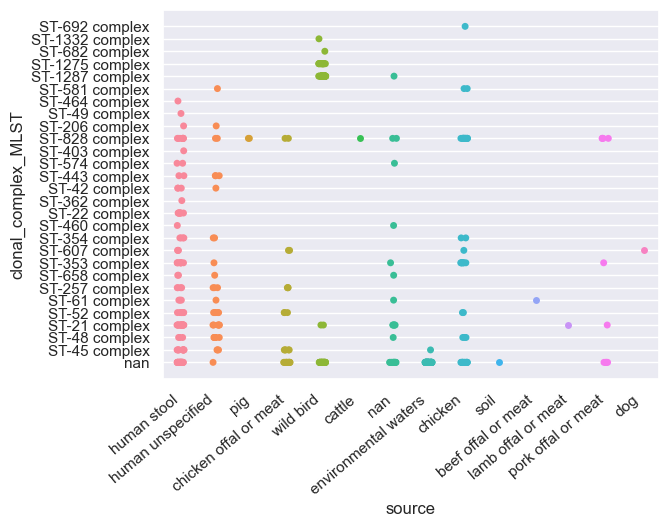

In [293]:
sns.stripplot(x="source", y="clonal_complex_MLST", data=datastr), plt.xticks(rotation=40, ha= 'right')

**Correlation**

So far it appears there aren't any trends

Rename the data frame chidat to make it easier to track what version of the data frame is being used in each statistical test. 
First the names for the categorical data are printed

In [294]:
chidat = datastr
categorical_col = ['source', 'aspA', 'gltA', 'glyA', 'pgm', 'tkt', 'uncA', 'ST_MLST', 'clonal_complex_MLST']
print(categorical_col)

['source', 'aspA', 'gltA', 'glyA', 'pgm', 'tkt', 'uncA', 'ST_MLST', 'clonal_complex_MLST']


I'm interested to first see if there is a relationahip between cource and clonal_complex_MLST. First make a contingency table to give an idea of the distribution of the data points in one of the variables in relation to the other

In [295]:
chisqt = pd.crosstab(chidat.source, chidat.clonal_complex_MLST, margins=True)

print(chisqt)


clonal_complex_MLST    ST-1275 complex  ST-1287 complex  ST-1332 complex  \
source                                                                     
beef offal or meat                   0                0                0   
cattle                               0                0                0   
chicken                              0                0                0   
chicken offal or meat                0                0                0   
dog                                  0                0                0   
environmental waters                 0                0                0   
human stool                          0                0                0   
human unspecified                    0                0                0   
lamb offal or meat                   0                0                0   
nan                                  0                1                0   
pig                                  0                0                0   
pork offal o

Using a contigency program to determine the p value, statistical value and degree of freedom

In [296]:
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])

print(chi2_contingency(value)[0:3])


(nan, nan, 4)


C:\Users\supa20\Anaconda3\lib\site-packages\scipy\stats\contingency.py:128: RuntimeWarning: invalid value encountered in true_divide
  expected = reduce(np.multiply, margsums) / observed.sum() ** (d - 1)


The chi suare test cannot be run when there are zeros in the contigency table so these need to be removed

In [297]:
chisqto= chisqt.loc[:, ~(chisqt == 0).any(0)]

I then used the contingency programe to determine the p value, statistical value and degree of freedom

In [298]:
value = np.array([chisqto.iloc[0][0:5].values,
                  chisqto.iloc[1][0:5].values])

print(chi2_contingency(value)[0:3])



(0.0, 1.0, 0)


This approach may not be the most apporpriate method to preform the Chi Square test on the dataset

Rename the data frame so there is no confusion between tests

In [299]:
hmdf = data3


I first built a table that will be used the display all the results from the individual chi square tests

In [300]:
column_names=hmdf.columns
chisqmatrix=pd.DataFrame(hmdf,columns=column_names,index=column_names)
chisqmatrix

,source,aspA,glnA,gltA,glyA,pgm,tkt,uncA,ST_MLST,clonal_complex_MLST
source,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
glnA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gltA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
glyA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pgm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tkt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uncA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ST_MLST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clonal_complex_MLST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


First I need to switch to using the crosstab function and load all the variables into a contingency table. If the expected frequency of two data points accounts for less than 4% of the frequencies between those two variables, these p values will be mitigated.  The remaining p values are calculated in a loop

In [301]:
outercnt = 0
innercnt = 0

for icol in column_names: 
    for jcol in column_names:              
        mycrosstab=pd.crosstab(hmdf[icol],hmdf[jcol])
        cntexpected=expected[expected<1].size
        perexpected=((expected.size-cntexpected)/expected.size)*100
        stat,p,dof,expected=stats.chi2_contingency(mycrosstab)
        chisqmatrix.iloc[outercnt,innercnt]=p
         
        if icol==jcol:
            chisqmatrix.iloc[outercnt,innercnt]=0.00
        
        innercnt=innercnt+1
        
    outercnt=outercnt+1
    innercnt=0

In [302]:
chisqmatrix

,source,aspA,glnA,gltA,glyA,pgm,tkt,uncA,ST_MLST,clonal_complex_MLST
source,0.0,4.498841e-27,2.571129e-110,4.270366e-26,1.854408e-86,1.021309e-23,0.000002,8.336549e-12,1.459588e-09,0.0
aspA,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,8.284045e-219,0.0
glnA,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.367958e-304,0.0
gltA,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
glyA,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
pgm,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
tkt,0.000002,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0
uncA,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,7.332940e-301,0.0
ST_MLST,0.0,8.284045e-219,1.367958e-304,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,7.332940e-301,0.000000e+00,0.0
clonal_complex_MLST,0.0,1.493174e-281,2.508681e-268,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,2.694685e-103,0.0


A heatmap and scatter matrix are then used to summarries the data from the above table. The data first needs to be converted to a float

In [304]:
data_new1 = chisqmatrix.copy()                                 
data_new1 = data_new1.astype(float)   

Thw vmin and vmax have been set to 0.05, the convential standard p value

<AxesSubplot:>

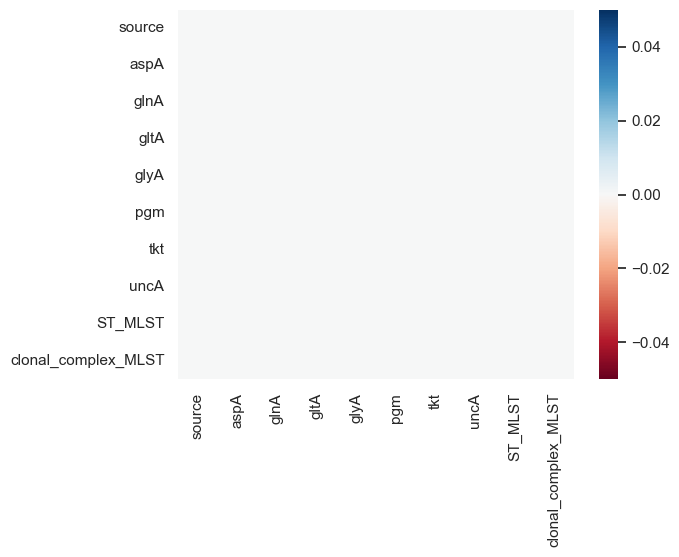

In [307]:
sns.heatmap(data_new1, vmin=-0.05, vmax=0.05, cmap="RdBu")